# Lookback time (scale factor vs cosmic time movie)
Florent Leclercq<br/>
Institut d'Astrophysique de Paris<br/>
17 July 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.max_open_warning': 20})

In [2]:
from LookbackTimeLib import *
Npast = int(Nframes*(-tmin)/(tmax-2*tmin))

# find the time of dark energy domination
aDE=fsolve(lambda a : w0waCDM4.Om(a2z(1.))*a**(-3) - w0waCDM4.Ode(a2z(1.)), 1.)[0]
tDE=-w0waCDM4.lookback_time(a2z(aDE)).value

In [3]:
class movie:
    def __init__(self, t, a1=None, a2=None, a3=None, a4=None):
        self.fig, self.ax = plt.subplots(1,1, figsize=(6,4))
        self.steps = len(t)
        self.a1, self.a2, self.a3, self.a4 = a1, a2, a3, a4

    def show(self):
        self.fig.show()
    
    # Initialization function
    def init(self):
        ax = self.ax
        a1, a2, a3, a4 = self.a1, self.a2, self.a3, self.a4
        frame = 0
        Nstart = 0
        ax.set_xlim([tmin-1.,tmax])
        ax.set_ylim([0.,3.])
        self.band1 = ax.fill_between([tmin-1.,tDE],[0.,0.],[3.,3.], color="C0", alpha=0.)
        self.band2 = ax.fill_between([tDE,tmax],[0.,0.],[3.,3.], color="C7", alpha=0.)
        if a1 is not None:
            self.plot1, = ax.plot(t[Nstart:frame], (a1*acrit1)[Nstart:frame], color="C1")
            self.hline, = ax.plot([tcrit1-5,tcrit1+5], [acrit1,acrit1], ls="None", color="black")
        else:
            self.plot1, self.hline = None, None
        if a2 is not None:
            self.plot2, = ax.plot(t[Nstart:frame], (a2*acrit1)[Nstart:frame], color="C3")
        else:
            self.plot2 = None
        if a3 is not None:
            self.plot3, = ax.plot(t[Nstart:frame], (a3*acrit1)[Nstart:frame], color="C4")
        else:
            self.plot3 = None
        if a4 is not None:
            self.plot4, = ax.plot(t[Nstart:frame], (a4*acrit1)[Nstart:frame], color="C9")
        else:
            self.plot4 = None
        return self.plot1, self.hline, self.plot2, self.plot3, self.plot4, self.band1, self.band2, 
    
    # Update function
    def update(self, frame):
        a1, a2, a3, a4 = self.a1, self.a2, self.a3, self.a4
        Nstart = Npast if frame>Npast else 0
        
        if frame>Npast:
            self.band1.set_alpha(0.25)
        if frame>Npast and t[frame]>tDE:
            self.band2.set_alpha(0.25)
        
        if a1 is not None:
            self.plot1.set_data(t[Nstart:frame], (a1*acrit1)[Nstart:frame])
            if t[frame]>tcrit1:
                self.hline.set_linestyle(":")
        if a2 is not None:
            self.plot2.set_data(t[Nstart:frame], (a2*acrit1)[Nstart:frame])
        if a3 is not None:
            self.plot3.set_data(t[Nstart:frame], (a3*acrit1)[Nstart:frame])
        if a4 is not None:
            self.plot4.set_data(t[Nstart:frame], (a4*acrit1)[Nstart:frame])
        return self.plot1, self.hline, self.plot2, self.plot3, self.plot4, self.band1, self.band2, 
        
    # Create the animation
    def animate(self):
        animation = FuncAnimation(self.fig, self.update, frames=len(t), init_func=self.init, blit=False)
        return animation

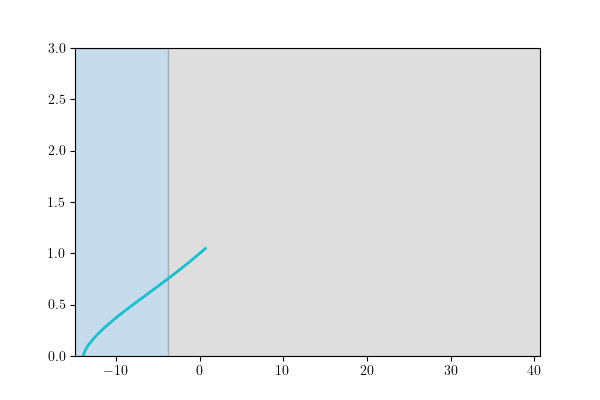

In [4]:
i=200
frame = movie(t, a1=None, a2=None, a3=None, a4=a4)
frame.init();
frame.update(i);

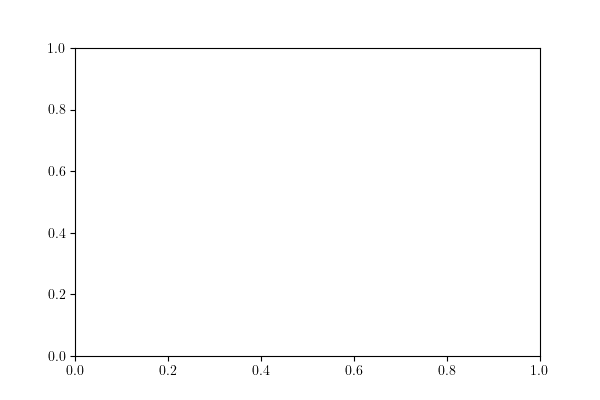

In [5]:
this_movie = movie(t, a1=None, a2=None, a3=None, a4=a4)
animation = this_movie.animate()

In [6]:
animation.save("output/ScaleFactorvsTimeLCDM.mp4", dpi=300, fps=48)